In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Overview
This dataset contains medical data used for predicting heart disease. The data includes various attributes such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), and ST depression induced by exercise relative to rest (oldpeak).

### **Column Descriptions:**

1. **age**: 
   - **Description**: Age of the patient in years.
   - **Data Type**: Integer (`int64`)

2. **sex**:
   - **Description**: Sex of the patient.
     - `1` = Male
     - `0` = Female
   - **Data Type**: Integer (`int64`)

3. **cp**:
   - **Description**: Chest pain type, categorized into four types.
     - `1` = Typical Angina
     - `2` = Atypical Angina
     - `3` = Non-Anginal Pain
     - `4` = Asymptomatic
   - **Data Type**: Integer (`int64`)

4. **trestbps**:
   - **Description**: Resting blood pressure (in mm Hg) on admission to the hospital.
   - **Data Type**: Integer (`int64`)

5. **chol**:
   - **Description**: Serum cholesterol level (in mg/dl).
   - **Data Type**: Integer (`int64`)

6. **fbs**:
   - **Description**: Fasting blood sugar > 120 mg/dl.
     - `1` = True (Fasting blood sugar > 120 mg/dl)
     - `0` = False
   - **Data Type**: Integer (`int64`)
7. **restecg**:
   - **Description**: Resting electrocardiographic results.
     - `0` = Normal
     - `1` = Having ST-T wave abnormality
     - `2` = Showing probable or definite left ventricular hypertrophy
   - **Data Type**: Integer (`int64`)

8. **thalach**:
   - **Description**: Maximum heart rate achieved during exercise.
   - **Data Type**: Integer (`int64`)

9. **exang**:
   - **Description**: Exercise-induced angina.
     - `1` = Yes
     - `0` = No
   - **Data Type**: Integer (`int64`)

10. **oldpeak**:
    - **Description**: ST depression induced by exercise relative to rest (a measure of how much the ST segment is depressed during exercise compared to rest).
    - **Data Type**: Float (`float64`)

11. **slope**:
    - **Description**: Slope of the peak exercise ST segment.
      - `1` = Upsloping
      - `2` = Flat
      - `3` = Downsloping
    - **Data Type**: Integer (`int64`)

12. **ca**:
    - **Description**: Number of major vessels (0-3) colored by fluoroscopy.
    - **Data Type**: Integer (`int64`)

13. **thal**:
    - **Description**: Thalassemia (a blood disorder).
      - `1` = Normal
      - `2` = Fixed defect
      - `3` = Reversible defect
    - **Data Type**: Integer (`int64`)

14. **target**:
    - **Description**: Presence or absence of heart disease.
      - `1` = Presence
      - `0` = Absence
    - **Data Type**: Integer (`int64`)


In [2]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
df[features_to_convert] = df[features_to_convert].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


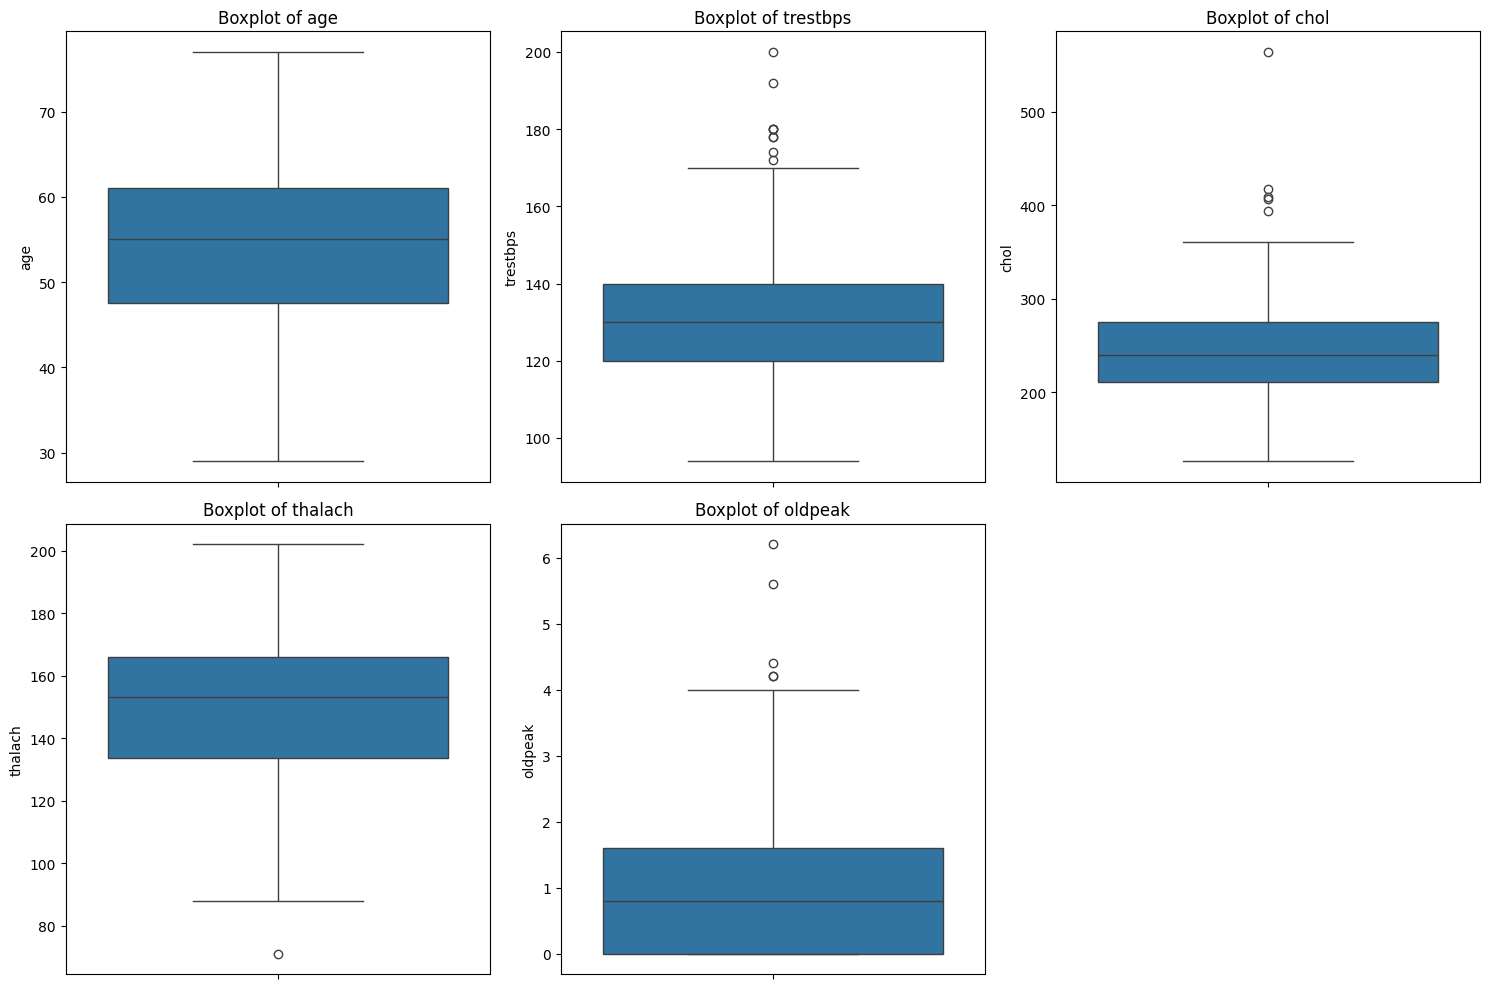

In [9]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [10]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
print("Number of outliers detected:")
print(outliers.sum())


Number of outliers detected:
age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


In [11]:
df['sex'] = df['sex'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df['ca'] = df['ca'].astype(int)
df['target'] = df['target'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 33.3+ KB


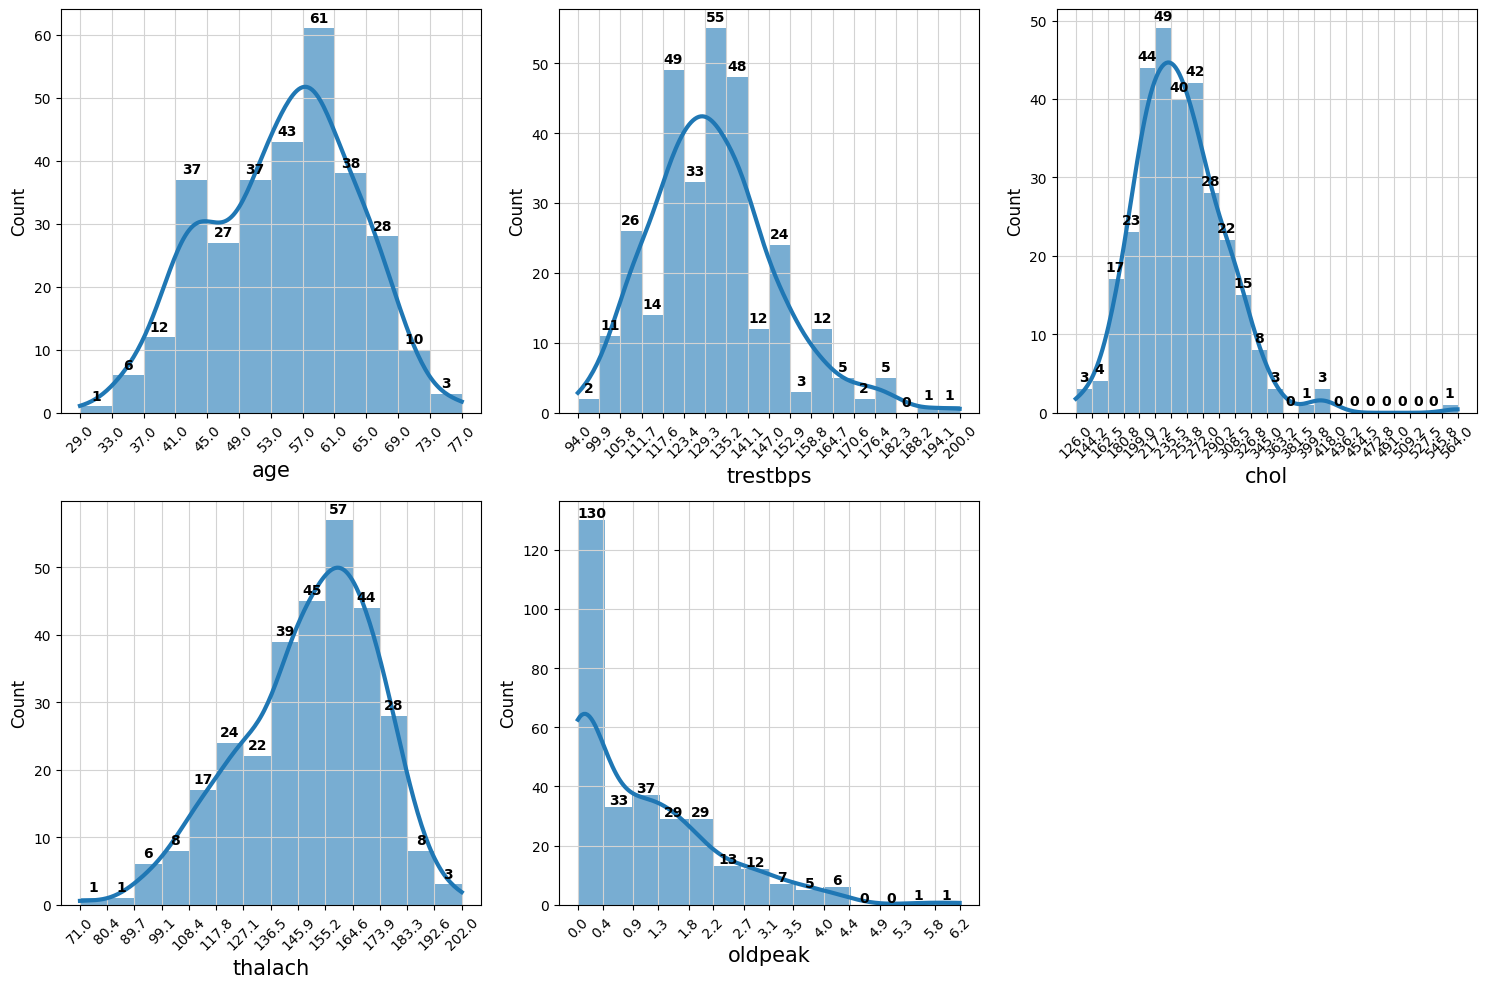

In [12]:
df_continuous = df[continuous_features].iloc[:, :5]

# subplot grid
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop 
for i, col in enumerate(df_continuous.columns):
    x, y = divmod(i, 3)  # Determine subplot location
    values, bin_edges = np.histogram(df_continuous[col], bins='auto')
    
    sns.histplot(df_continuous[col], bins=bin_edges, kde=True, ax=ax[x, y], edgecolor='none', alpha=0.6, line_kws={'lw': 3})
    
    # Format
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    # Annotate bars with counts
    for p in ax[x, y].patches:
        height = p.get_height()
        ax[x, y].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height + 1),
                          ha='center', fontsize=10, fontweight="bold")

# Remove unused subplots 1
for j in range(len(df_continuous.columns), 6): 
    fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show()

This code categorizes patients in the dataset into risk categories based on a combination of factors related to heart disease, such as oldpeak, ca, thalach, cp, age, trestbps, and chol. This categorization could be useful for identifying patients at different levels of risk for heart-related issues, which could then be used as part of a clustering analysis to further explore patterns in the data.

In [13]:
def assign_risk_category(row):
    if row['target'] == 1:
        if row['oldpeak'] > 2 or row['ca'] > 1:
            return 'High Risk'
        elif row['thalach'] < 120 or (row['cp'] in [1, 2] and row['age'] > 60):
            return 'Moderate Risk'
        else:
            return 'Low Risk'
    else:
        if row['trestbps'] > 140 or row['chol'] > 240:
            return 'Moderate Risk'
        else:
            return 'Low Risk'

df['risk_category'] = df.apply(assign_risk_category, axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,risk_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,High Risk
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,High Risk
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Low Risk
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Low Risk
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Moderate Risk
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Moderate Risk
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Moderate Risk
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Low Risk


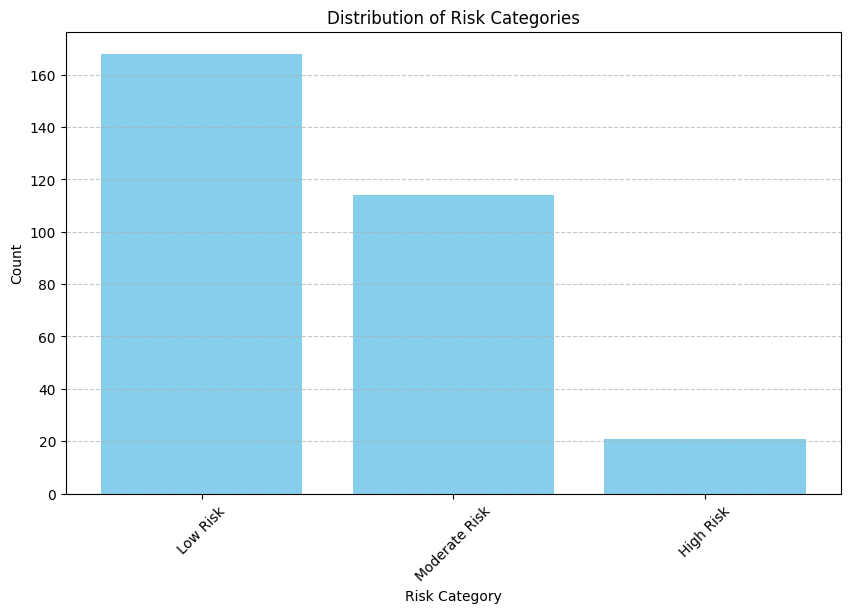

In [14]:
risk_counts = df['risk_category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(risk_counts.index, risk_counts.values, color='skyblue')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.title('Distribution of Risk Categories')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Save target and risk_category columns
target_col = df['target']
risk_category_col = df['risk_category']


### Code Explanation:

   - **`setup(df, ...)`**: This initializes the environment for clustering with your DataFrame `df`. It configures various preprocessing steps based on the arguments provided.
   - **`session_id=123`**: This sets a seed for random number generation, ensuring reproducibility of results.
   - **`normalize=True`**: This enables normalization, which scales your features so that they have similar ranges, improving the performance of the clustering algorithms.
   - **`normalize_method='robust'`**: This specifies the normalization method to be used. The 'robust' method scales the data using the interquartile range, which is less sensitive to outliers.
   - **`remove_outliers=False`**: This disables automatic outlier removal during preprocessing. This is useful if you want to retain all data points, including outliers, in your clustering analysis.
   - **`ignore_features=['target', 'risk_category']`**: This tells PyCaret to ignore the `target` and `risk_category` columns during clustering. Since these columns are not features but labels or derived categories, they should not influence the clustering process.

### Summary:
The code sets up the environment for clustering by configuring preprocessing steps like normalization and specifying which features to ignore. The `target` and `risk_category` columns are saved for later use,  for evaluating and visualizing the clustering results in relation to these labels.

the goal is to group similar data points without using any labels or predefined categories. Including labeled columns like target or risk_category in the clustering process would introduce information that isn't available in a true unsupervised setting, which could bias the results.

By excluding these columns (target and risk_category) in the setup process, you're ensuring that the clustering algorithm only considers the features that are relevant for identifying natural groupings within the data, without relying on any predefined labels.

In [16]:
from pycaret.clustering import *

exp = setup(df, session_id=123, 
                normalize=True,
              normalize_method='robust',
             remove_outliers=False,
              ignore_features=['target', 'risk_category'])


,Description,Value
0,Session id,123
1,Original data shape,"(303, 15)"
2,Transformed data shape,"(303, 23)"
3,Ignore features,2
4,Numeric features,9
5,Categorical features,4
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


The KMeans clustering model results indicate poor clustering performance:

- **Silhouette Score**: Low at 0.1134, suggesting clusters may overlap or be poorly defined.
- **Calinski-Harabasz Index**: A value of 37.5720 shows some level of cluster separation but needs comparison to benchmarks.
- **Davies-Bouldin Index**: High at 2.3188, indicating clusters are somewhat similar to each other.
- **Homogeneity**: 0, meaning clusters do not predominantly consist of members from a single class.
- **Rand Index**: 0, showing no similarity between clustering results and the true labels.
- **Completeness**: 0, indicating that not all instances of a class are clustered together.

Overall, these metrics suggest that the KMeans clustering may not be capturing meaningful patterns in the data.

In [17]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1134,37.5720,2.3188,0,0,0


In [18]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

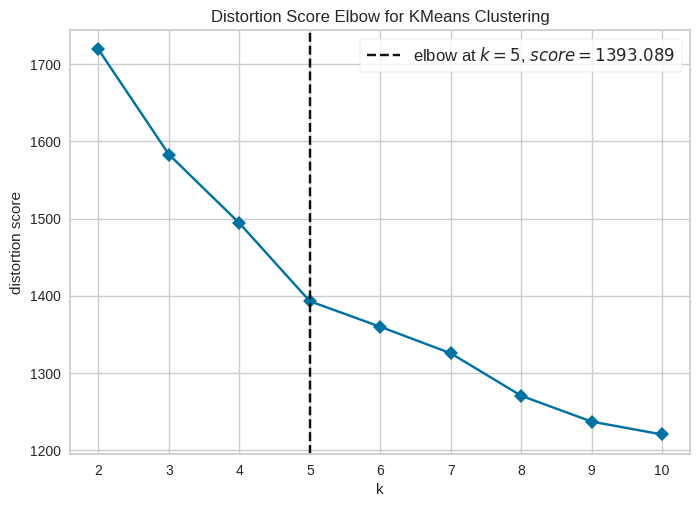

In [526]:
plot_model(kmeans, plot = 'elbow')


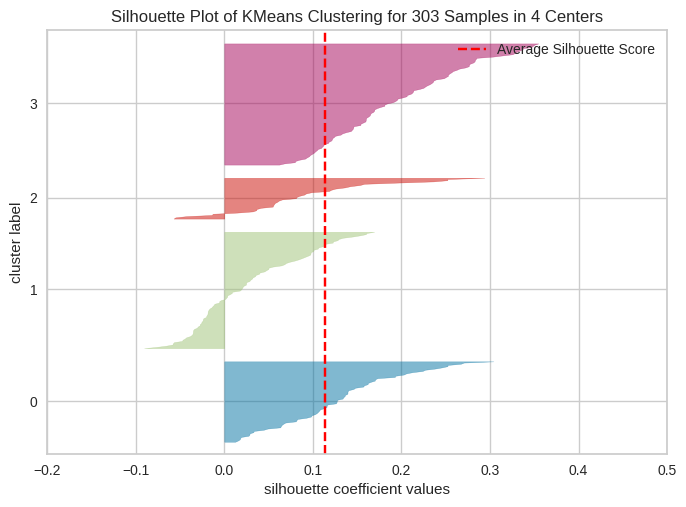

In [527]:
plot_model(kmeans, plot = 'silhouette')


Overall, the model with 3 clusters shows a slight improvement in some metrics compared to 4 clusters, but the results still suggest that neither configuration provides satisfactory clustering performance. Further refinement or alternative clustering methods might be needed.

In [22]:
kmeans_model_3_clusters = create_model('kmeans', num_clusters=3)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1163,44.9505,2.5057,0,0,0


In [23]:
evaluate_model(kmeans_model_3_clusters)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

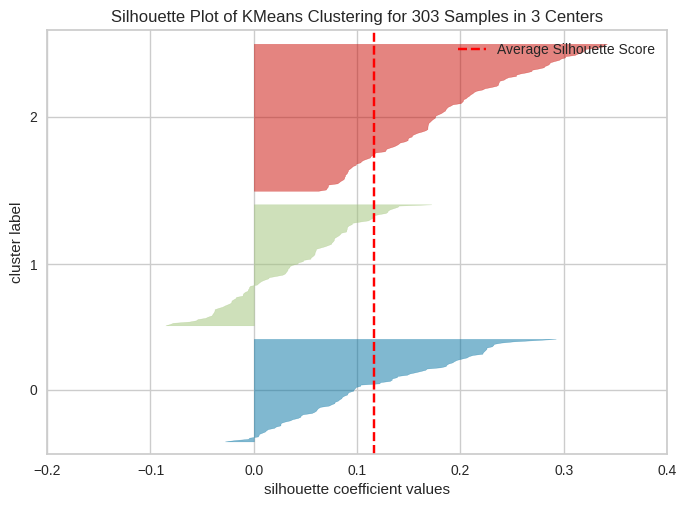

In [530]:
plot_model(kmeans_model_3_clusters, plot = 'silhouette')


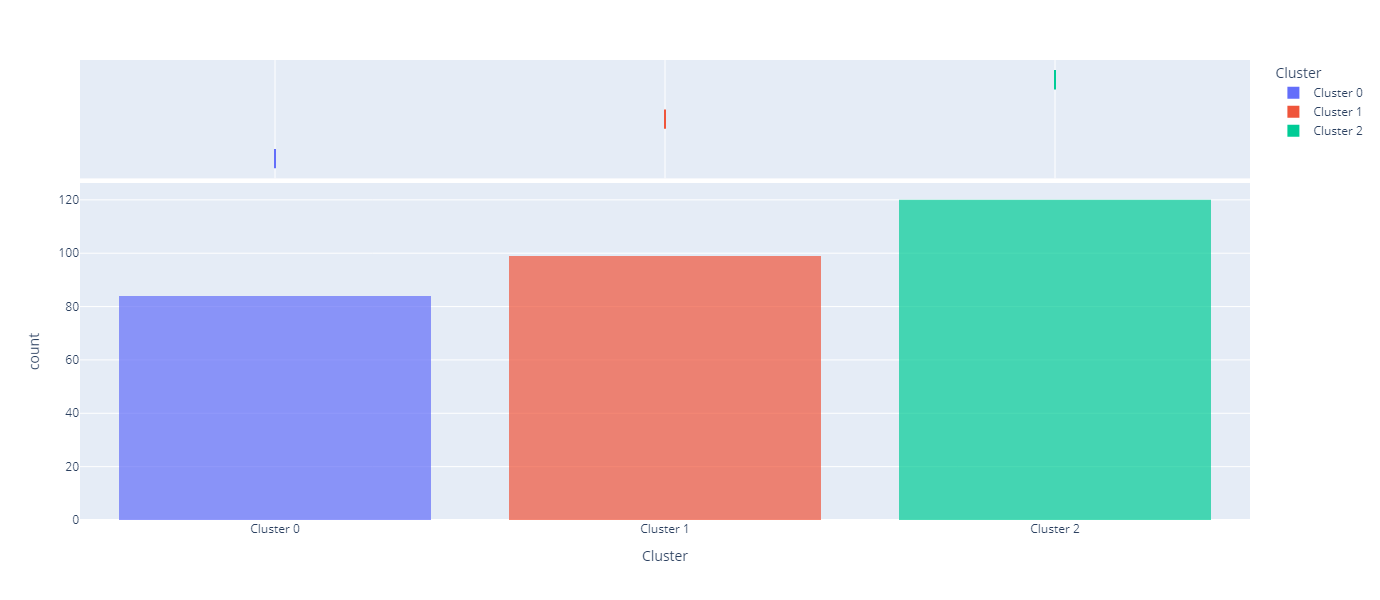

In [531]:
plot_model(kmeans_model_3_clusters, plot = 'distribution')


Data Preparation for analysis the clusters:

- df_clustered: After assigning clusters using kmeans_model_3_clusters, this DataFrame now includes:
- Cluster: The cluster each sample belongs to.
- target: The actual class labels.
- risk_category: Risk categories assigned based on some criteria.

In [532]:
df_clustered = assign_model(kmeans_model_3_clusters)

df_clustered['target'] = target_col.values
df_clustered['risk_category'] = risk_category_col.values
df_clustered

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Cluster,target,risk_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Cluster 1,1,High Risk
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,Cluster 2,1,High Risk
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,Cluster 2,1,Low Risk
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,Cluster 2,1,Low Risk
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,Cluster 2,1,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,Cluster 1,0,Moderate Risk
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,Cluster 2,0,Moderate Risk
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,Cluster 0,0,Moderate Risk
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,Cluster 0,0,Low Risk


In [543]:
cluster_risk_counts = df_clustered.groupby(['Cluster', 'risk_category']).size().reset_index(name='count')

In [539]:
pivot_data = cluster_risk_counts.pivot(index='Cluster', columns='risk_category', values='count').fillna(0)
print(pivot_data)


risk_category  High Risk  Low Risk  Moderate Risk
Cluster                                          
Cluster 0             11        21             52
Cluster 1              6        45             48
Cluster 2              4       102             14


- Cluster 0: Contains 11 high-risk, 21 low-risk, and 52 moderate-risk samples.
- Cluster 1: Contains 6 high-risk, 45 low-risk, and 48 moderate-risk samples.
- Cluster 2: Contains 4 high-risk, 102 low-risk, and 14 moderate-risk samples.
- This pivot table helps in understanding the distribution of risk categories within each cluster.

In [547]:
cluster_risk_counts = df_clustered.groupby(['Cluster', 'target']).size().reset_index(name='count')


In [548]:
pivot_data = cluster_risk_counts.pivot(index='Cluster', columns='target', values='count').fillna(0)
print(pivot_data)

target      0   1
Cluster          
Cluster 0  72  12
Cluster 1  43  56
Cluster 2  23  97


- Cluster 0: Contains 72 samples with target 0 and 12 samples with target 1.
- Cluster 1: Contains 43 samples with target 0 and 56 samples with target 1.
- Cluster 2: Contains 23 samples with target 0 and 97 samples with target 1.
- This pivot table helps in understanding how well the clusters align with the actual target labels.

In [445]:
df_clustered.to_csv('df_clustered.csv', index=False)

In [78]:
import pycaret.clustering as pc
print(dir(pc))

['ClusteringExperiment', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'add_metric', 'assign_model', 'create_model', 'deploy_model', 'evaluate_model', 'functional', 'get_allowed_engines', 'get_config', 'get_current_experiment', 'get_engine', 'get_logs', 'get_metrics', 'load_experiment', 'load_model', 'models', 'oop', 'plot_model', 'predict_model', 'pull', 'remove_metric', 'save_experiment', 'save_model', 'set_config', 'set_current_experiment', 'setup']


In [345]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


 iteratively creating and storing different clustering models (`KMeans`, `Affinity Propagation`, `Mean Shift`, `Spectral Clustering`, `Hierarchical Clustering`, `DBSCAN`, `OPTICS`, and `BIRCH`) in a dictionary. This approach allow  to compare their performance and choose the most suitable clustering method for the data.

In [470]:
model_ids = ['kmeans', 'ap', 'meanshift', 'sc', 'hclust', 'dbscan', 'optics', 'birch']
models_results = {}

for model_id in model_ids:
    model = create_model(model_id)
    models_results[model_id] = model 

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1134,37.5720,2.3188,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1042,12.6339,1.7285,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4019,4.5338,0.4587,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1228,24.9418,1.5890,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0991,32.8165,2.3350,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1557,5.8149,1.9361,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0853,33.9822,2.4497,0,0,0


#### Issue:
Most data points are grouped into a single cluster, with only one  in another cluster when plotted.

In [471]:
meanshift_model = create_model('meanshift')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4019,4.5338,0.4587,0,0,0


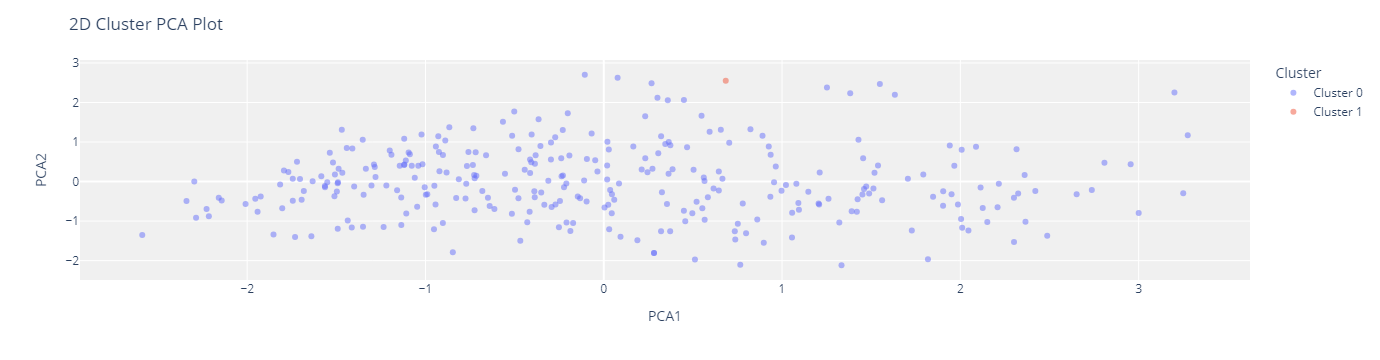

In [472]:
plot_model(meanshift_model, plot='cluster')


In [24]:
sc_model = create_model('sc')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1228,24.9418,1.5890,0,0,0


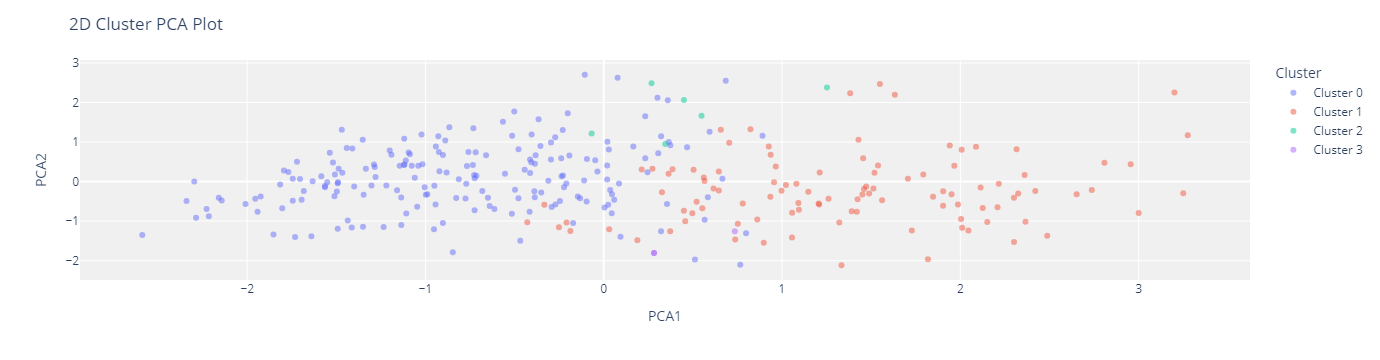

In [477]:
plot_model(sc_model, plot='cluster')


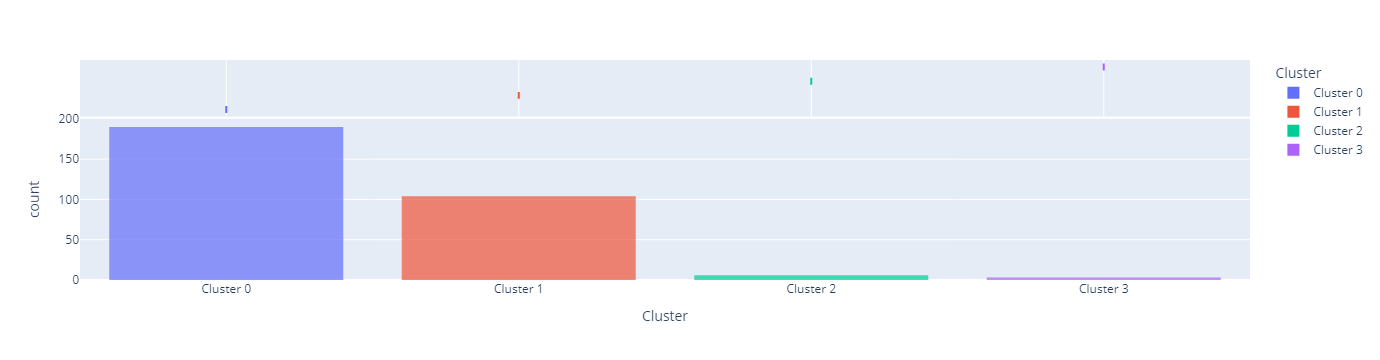

In [487]:
plot_model(sc_model, plot = 'distribution')


In [25]:
evaluate_model(sc_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

(sc_model_3_clusters):

Cluster Quality: The Spectral Clustering with 3 clusters shows a slight improvement in cluster definition and separation compared to the previous result but still struggles with aligning clusters to actual classes or risk categories.
Cluster Separation: While the Calinski-Harabasz Index has improved, the low Silhouette Score and Davies-Bouldin Index suggest that the clusters are still not very distinct or well-separated.

In [26]:
sc_model_3_clusters = create_model('sc', num_clusters=3)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1565,32.9569,1.6734,0,0,0


In [27]:
evaluate_model(sc_model_3_clusters)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
evaluate_model(sc_model_3_clusters)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [493]:
df_clustered2 = assign_model(sc_model_3_clusters)

df_clustered2['target'] = target_col.values
df_clustered2['risk_category'] = risk_category_col.values
df_clustered2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Cluster,target,risk_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Cluster 0,1,High Risk
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,Cluster 0,1,High Risk
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,Cluster 0,1,Low Risk
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,Cluster 0,1,Low Risk
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,Cluster 0,1,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,Cluster 1,0,Moderate Risk
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,Cluster 0,0,Moderate Risk
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,Cluster 1,0,Moderate Risk
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,Cluster 1,0,Low Risk


In [544]:
cluster_risk_counts = df_clustered2.groupby(['Cluster', 'risk_category']).size().reset_index(name='count')

In [537]:
pivot_data = cluster_risk_counts.pivot(index='Cluster', columns='risk_category', values='count').fillna(0)
print(pivot_data)


risk_category  High Risk  Low Risk  Moderate Risk
Cluster                                          
Cluster 0             12       137             43
Cluster 1              6        31             71
Cluster 2              3         0              0


In [545]:
cluster_risk_counts = df_clustered2.groupby(['Cluster', 'target']).size().reset_index(name='count')

In [542]:
pivot_data = cluster_risk_counts.pivot(index='Cluster', columns='target', values='count').fillna(0)
print(pivot_data)

target      0    1
Cluster           
Cluster 0  42  150
Cluster 1  96   12
Cluster 2   0    3



- **Cluster Characteristics**:
  - **Cluster 0**: Contains a mix of risk categories and is heavily associated with target 1.
  - **Cluster 1**: Shows a more balanced distribution of risk categories but is primarily associated with target 0.
  - **Cluster 2**: Almost exclusively high-risk and target 1, which may indicate an issue with clustering or data representation.

- **Cluster Quality**: The results suggest that while the clusters do separate some of the data, there are issues with the alignment of clusters to risk categories and target labels. Cluster 2, in particular, shows poor distribution.

